<a href="https://colab.research.google.com/github/mopahlevani/Numerical-Simulation/blob/main/ODE_Training_Mohammad_Hadi_Pahlevani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

# Ordinary differential equations training

## 1. First training, with  a simple equation


We want to solve the very simple equation :$\frac{dx}{dt}=-kx$, with $x(t=0)=x_0$ as an initial boundary condition.
1) Solve the equation anlaytically and write the solution below x(t)=

**$$x(t)=x_0 e^{-kt}$$**

To what physical process it would correspond ? What is the dimension of $1/k$ assuming that $t$ is a time ?

$$Damped Harmonic Oscillator -
[ 1/k ] = [ 1 / time ]$$

In the following we call $f(x,t)$ the derivative $\frac{dx}{dt}=-kx $, so that the system we want to solve can be simply written $\frac{dx}{dt}=f(x,t)$

#### 1.1 Euler solver

Build a function called $deriv(x,t)$ that returns f(x,t). k will be declared as a global variables, defined outside the function $deriv(x,t)$. You can use the following template. Print f for x0=1, t=10., k=1.

In [2]:
k=1

def deriv(x,t):
    global k
    f = -1 * k * x
    return f

print(deriv(1,10))

-1


Build a simple Euler solver: define dt, and write an iterative procedure that at each time step
* 1) compute f(x,t)
* 2) increment x according to the Euler scheme : x(t+dt)=x(t)+dt*f(x,t)
* 3) keep in memory the new value of x(t)
* 3) time=time+dt

Of course, before that you must initialize time=0 and x(t=0)=1


plot the result for dt=0.1 and for time going from 0 to t=5

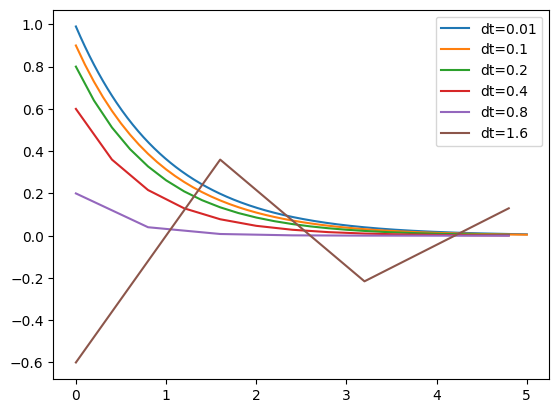

In [3]:

dts=[0.01,0.1,0.2,0.4,0.8,1.6]

for dt in dts:
  T=[]
  X=[]
  t = 0
  x = 1
  while t < 5:
    f = deriv(x,t)
    x = x + f * dt
    X.append(x)
    T.append(t)
    t = t + dt
  plt.plot(T, X, label=f'dt={dt}')

plt.legend()
plt.show()

Plot the difference between the numeric solution and the anlytical solution. Do you have comments ?

Redo the same exercice for dt=0.2, 0.4, 0.8, 1.6,Comment ?

#### 1.2 Second order solver


Redo the same as before, but with the modifed Euler explicit scheme (see lecture)

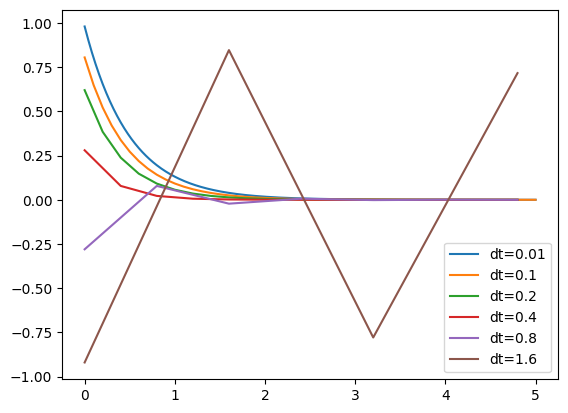

In [4]:

dts=[0.01,0.1,0.2,0.4,0.8,1.6]

for dt in dts:
  T=[]
  X=[]
  t = 0
  x = 1
  while t < 5:
    x_modified = x + dt/2 * deriv(x,t)
    t_modified = t + dt/2
    x = x + dt * (deriv(x,t)+deriv(x_modified, t_modified))
    X.append(x)
    T.append(t)
    t = t + dt
  plt.plot(T, X, label=f'dt={dt}')

plt.legend()
plt.show()

## 2 Energy conservative system: orbital motion in 2D (2nd order solver)

We now solve an energy conservative system, with no, or complex solution. We consider the gravity equation of a body with mass body with mass M. The equation of motion is :

$\frac{dX^2 }{dt^2}=-\frac{GM}{r^2}\times\frac{X}{r}$


$\frac{dY^2 }{dt^2}=-\frac{GM}{r^2}\times\frac{Y}{r}$




Where G is the universal gravity constant and $r=(X^2+Y^2)^{1/2}$. This is a coupled system of 2 second order equations. Rewrite it as a system of 4 first order equations, using $Vx$ and $Vy$ : the X and Y component of velocity in cartesian coordinates.

The system of 4 first order equations is :




$\frac{dV_x^2 }{dt^2}=-\frac{GM}{r^2}\times\frac{X}{r}$

$\frac{dx}{dt}=V_x$

$\frac{dV_y^2 }{dt^2}=-\frac{GM}{r^2}\times\frac{Y}{r}$

$\frac{dy}{dt}=V_y$


We will take the Earth-Moon system (check mass values on internet, work in METRIC SYSTEM UNITS !!) We will consider that the initial position of the moon at time=0 is X=384000km , Y=0, and that its velocity is Vx=0, $Vy=+a \omega $, where $a$ is the inital Earth-Moon distance (called semi-major axis), and $\omega=(GM/a^3)^{1/2}$ is the orbital angular velocity. The orbital period of the Moon, in, in theory should be $T=2\pi/\omega$

Write a function called $gravderiv(X,Y,Vx,Vy,t)$ that returns the derivative of vector (X,Y,Vx,Vy)

In [5]:
def gravderiv(X,Y,Vx,Vy,t):
  r = (X**2+Y**2)**(1/2)
  return [Vx,Vy,-G*M*X/(r**3),-G*M*Y/(r**3)]

Write a program that integrate the Moon motion, from time=0 to time=100T, using the Modified Euler method.

In [6]:
t = 0
X=348000 * 1000
G = 6.67 * 10**-11
M = 6.0457 * 10**24
Y=0
Vx=0
a = 384400 * 1000
omega = (G * M / a**3)**(1/2)
Vy= + a * omega

T = 2 * np.pi / omega

dt = 0.01 * T
x_list = []
y_list = []
vx_list = []
vy_list = []
t_list = []

while t < 1 * T:
  X_predict = X + dt/2 * gravderiv(X,Y,Vx,Vy,t)[0]
  Y_predict = Y + dt/2 * gravderiv(X,Y,Vx,Vy,t)[1]
  Vx_predict = Vx + dt/2 * gravderiv(X,Y,Vx,Vy,t)[2]
  Vy_predict = Vy + dt/2 * gravderiv(X,Y,Vx,Vy,t)[3]
  t_predict = t + dt/2
  X = X + dt * (gravderiv(X,Y,Vx,Vy,t)[0]+gravderiv(X_predict,Y_predict,Vx_predict,Vy_predict,t_predict)[0])/2
  Y = Y + dt * (gravderiv(X,Y,Vx,Vy,t)[1]+gravderiv(X_predict,Y_predict,Vx_predict,Vy_predict,t_predict)[1])/2
  Vx = Vx + dt * (gravderiv(X,Y,Vx,Vy,t)[2]+gravderiv(X_predict,Y_predict,Vx_predict,Vy_predict,t_predict)[2])/2
  Vy = Vy + dt * (gravderiv(X,Y,Vx,Vy,t)[3]+gravderiv(X_predict,Y_predict,Vx_predict,Vy_predict,t_predict)[3])/2
  t = t + dt
  x_list.append(X)
  y_list.append(Y)
  vx_list.append(Vx)
  vy_list.append(Vy)
  t_list.append(t)


Use first a time-step dt= 0.01T . Plot the Moon motion X(t), Y(t), Vx(t), Vy(t)

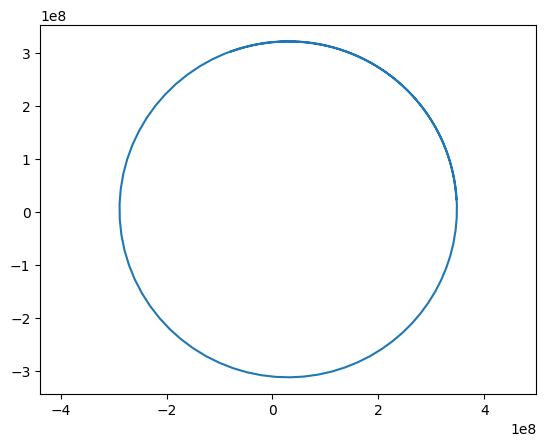

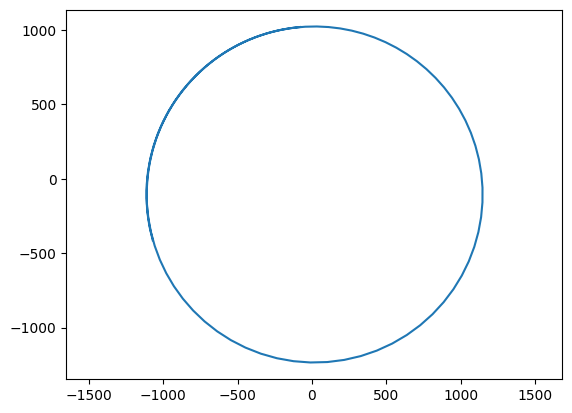

In [7]:

plt.axis('equal')
plt.plot(x_list,y_list)
plt.show()
plt.axis('equal')
plt.plot(vx_list,vy_list)
plt.show()


Compute at every time-step the total energy $E_T$ (Kinetic + Potential). Plot energy variations $\Delta_E(t)=\frac{E_T(t)-E_T(t=0)}{E_T(t=0)}$. Is energy really constant ? What happens in your opinion?

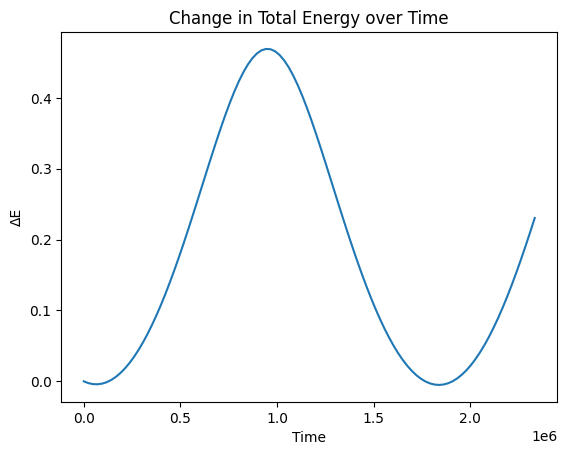

In [41]:
def E_total(M,G,X,Y,Vx,Vy):
  r = (X**2+Y**2)**(1/2)
  V = (Vx**2+Vy**2)**(1/2)
  E = 0.5*M*V**2 - G*M/r
  return E

def delta_E(E_total):
  delta = (E_total-E_total[0])/E_total[0]
  return delta

delta_E_list = []
E_total_list = []
t_list = []

i = 0
t = 0
dt = 0.01 * T

while t < T:
    E = E_total(M, G, x_list[i], y_list[i], vx_list[i], vy_list[i])
    E_total_list.append(E)

    if i == 0:
        E0 = E
    delta_E = (E - E0) / E0
    delta_E_list.append(delta_E)

    t_list.append(t)
    i += 1
    t += dt

plt.plot(t_list,delta_E_list, label = 'Delta E as a function of time')
plt.xlabel('Time')
plt.ylabel('ΔE')
plt.title('Change in Total Energy over Time')
plt.show()
#plt.plot(t_list,E_total_list, label = 'E total as a function of time')
#plt.xlabel('Time (s)')
#plt.ylabel('E')
#plt.title('Total Energy over Time')
#plt.show()

Redo the same for dt=0.1T and dt=0.5T: Plot the orbit in (X,Y) frame and $E_T$ as a function of time.

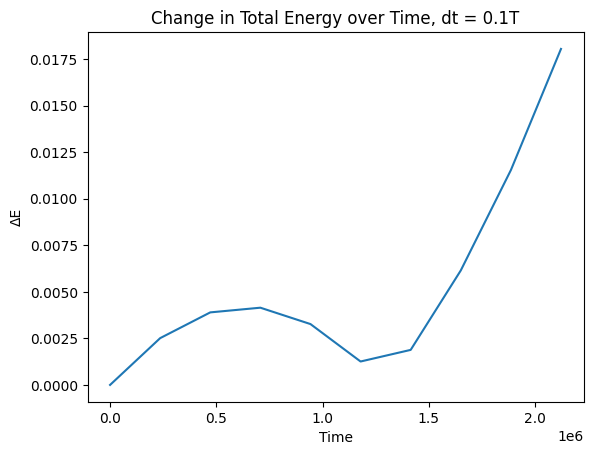

In [40]:
# dt = 0.1 T

delta_E_list = []
E_total_list = []
t_list = []

i = 0
t = 0
dt = 0.1 * T

while t < T:
    E = E_total(M, G, x_list[i], y_list[i], vx_list[i], vy_list[i])
    E_total_list.append(E)

    if i == 0:
        E0 = E
    delta_E = (E - E0) / E0
    delta_E_list.append(delta_E)

    t_list.append(t)
    i += 1
    t += dt

plt.plot(t_list,np.abs(delta_E_list), label = 'Delta E as a function of time')
plt.xlabel('Time')
plt.ylabel('ΔE')
plt.title('Change in Total Energy over Time, dt = 0.1T')
plt.show()
#plt.plot(t_list,E_total_list, label = 'E total as a function of time')
#plt.xlabel('Time (s)')
#plt.ylabel('E')
#plt.title('Total Energy over Time, dt = 0.1T')
#plt.show()

In [ ]:
Conclusion : What time-step should you use ?

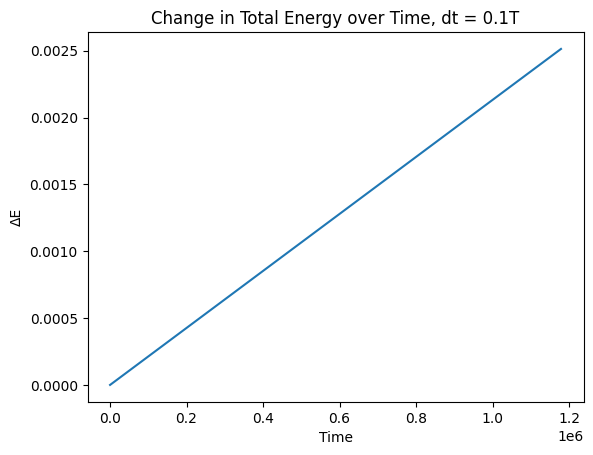

In [39]:
# dt = 0.5 T

delta_E_list = []
E_total_list = []
t_list = []

i = 0
t = 0
dt = 0.5 * T

while t < T:
    E = E_total(M, G, x_list[i], y_list[i], vx_list[i], vy_list[i])
    E_total_list.append(E)

    if i == 0:
        E0 = E
    delta_E = (E - E0) / E0
    delta_E_list.append(delta_E)

    t_list.append(t)
    i += 1
    t += dt

plt.plot(t_list,np.abs(delta_E_list), label = 'Delta E as a function of time')
plt.xlabel('Time')
plt.ylabel('ΔE')
plt.title('Change in Total Energy over Time, dt = 0.1T')
plt.show()
#plt.plot(t_list,E_total_list, label = 'E total as a function of time')
#plt.xlabel('Time (s)')
#plt.ylabel('E')
#plt.title('Total Energy over Time, dt = 0.1T')
#plt.show()

How to control the quality of your solution  in your opinion?

Now, let's considere a more complicated orbit. Start the same integration, but now the initial velocity has a small X component initially at t=0: $Vx=e V_y$, $Vy=+a \omega $, with $abs(e) < 1$. Choose e=0.01 and then e=0.1.

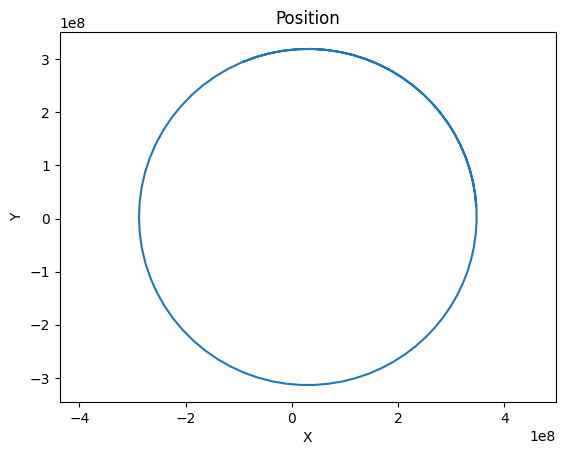

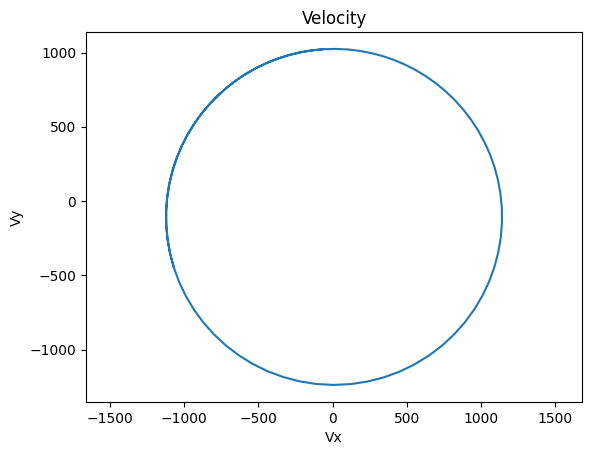

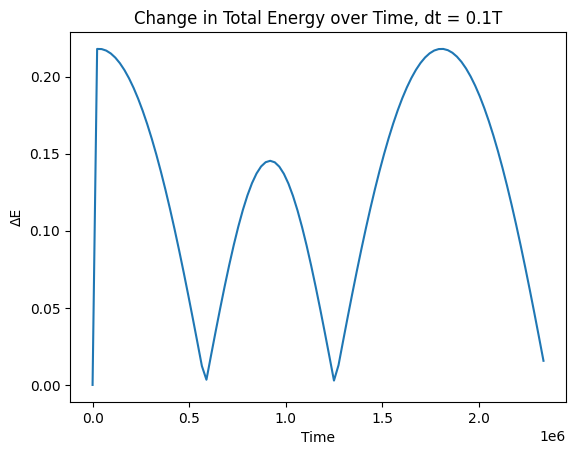

Display energy variations for e=0.01 and then e=0.1. What do you see ?

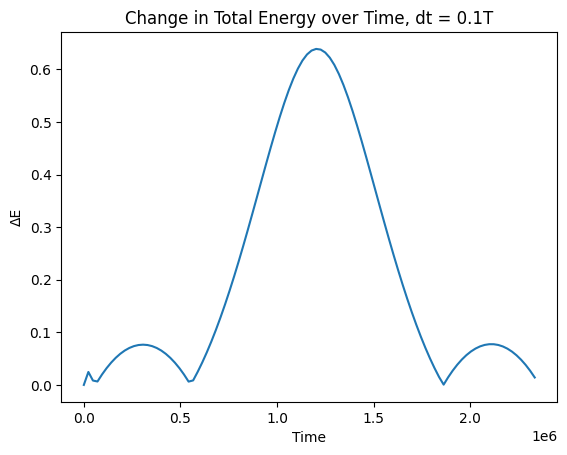

In [43]:
t = 0
i = 0
X=348000 * 1000
G = 6.67 * 10**-11
M = 6.0457 * 10**24
Y=0
Vy= + a * omega
e = 0.1
Vx= e * Vy
a = 384400 * 1000
omega = (G * M / a**3)**(1/2)

T = 2 * np.pi / omega

dt = 0.01 * T
x_list = []
y_list = []
vx_list = []
vy_list = []
t_list = []
delta_E_list = []
E_total_list = []
t_list = []

while t < 1 * T:
  X_predict = X + dt/2 * gravderiv(X,Y,Vx,Vy,t)[0]
  Y_predict = Y + dt/2 * gravderiv(X,Y,Vx,Vy,t)[1]
  Vx_predict = Vx + dt/2 * gravderiv(X,Y,Vx,Vy,t)[2]
  Vy_predict = Vy + dt/2 * gravderiv(X,Y,Vx,Vy,t)[3]
  t_predict = t + dt/2
  X = X + dt * (gravderiv(X,Y,Vx,Vy,t)[0]+gravderiv(X_predict,Y_predict,Vx_predict,Vy_predict,t_predict)[0])/2
  Y = Y + dt * (gravderiv(X,Y,Vx,Vy,t)[1]+gravderiv(X_predict,Y_predict,Vx_predict,Vy_predict,t_predict)[1])/2
  Vx = Vx + dt * (gravderiv(X,Y,Vx,Vy,t)[2]+gravderiv(X_predict,Y_predict,Vx_predict,Vy_predict,t_predict)[2])/2
  Vy = Vy + dt * (gravderiv(X,Y,Vx,Vy,t)[3]+gravderiv(X_predict,Y_predict,Vx_predict,Vy_predict,t_predict)[3])/2

  if i == 0:
      E0 = E
  delta_E = (E - E0) / E0
  delta_E_list.append(delta_E)

  x_list.append(X)
  y_list.append(Y)
  vx_list.append(Vx)
  vy_list.append(Vy)
  t_list.append(t)

  E = E_total(M, G, x_list[i], y_list[i], vx_list[i], vy_list[i])
  E_total_list.append(E)

  t = t + dt
  i += 1

#plt.axis('equal')
#plt.plot(x_list,y_list)
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.title('Position')
#plt.show()
#plt.axis('equal')
#plt.plot(vx_list,vy_list)
#plt.xlabel('Vx')
#plt.ylabel('Vy')
#plt.title('Velocity')
#plt.show()

plt.plot(t_list,np.abs(delta_E_list), label = 'Delta E as a function of time')
plt.xlabel('Time')
plt.ylabel('ΔE')
plt.title('Change in Total Energy over Time, dt = 0.1T')
plt.show()
#plt.plot(t_list,E_total_list, label = 'E total as a function of time')
#plt.xlabel('Time (s)')
#plt.ylabel('E')
#plt.title('Total Energy over Time, dt = 0.1T')
#plt.show()


## 3 Energy conservative system 2 : going to 4th order

Re-use the function that computes the derivative for  planetary motion (exercice 2). Now change the solver and code a Runge Kutta 4 scheme, that is 4th order. Put your code below.

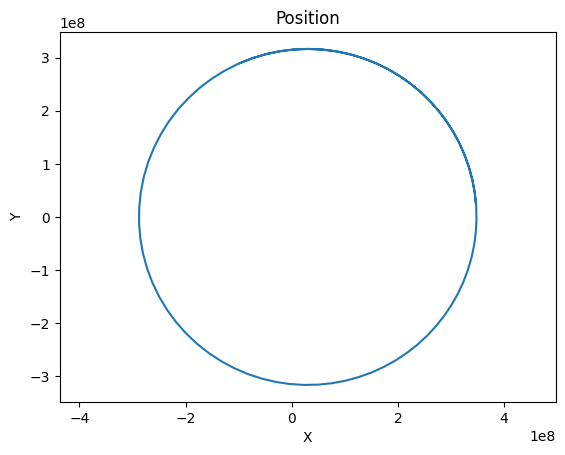

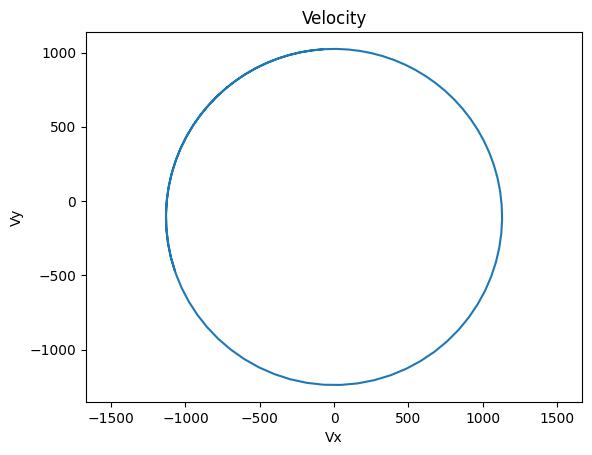

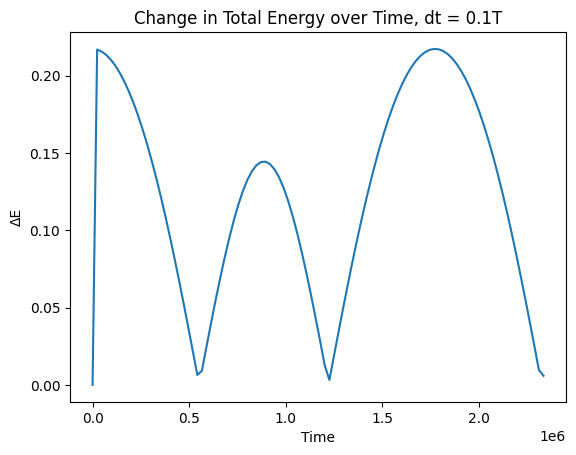

In [51]:
t = 0
i = 0
X=348000 * 1000
G = 6.67 * 10**-11
M = 6.0457 * 10**24
Y=0
Vy= + a * omega

Vx= 0
a = 384400 * 1000
omega = (G * M / a**3)**(1/2)

T = 2 * np.pi / omega

dt = 0.01 * T
x_list = []
y_list = []
vx_list = []
vy_list = []
t_list = []
delta_E_list = []
E_total_list = []
t_list = []

while t < 1 * T:
  x1 = dt * gravderiv(X,Y,Vx,Vy,t)[0]
  y1 = dt * gravderiv(X,Y,Vx,Vy,t)[1]
  vx1 = dt * gravderiv(X,Y,Vx,Vy,t)[2]
  vy1 = dt * gravderiv(X,Y,Vx,Vy,t)[3]

  x2 = dt * gravderiv(X+(x1/2),Y+ (y1/2),Vx + (vx1/2),Vy + (vy1/2),t+(dt/2))[0]
  y2 = dt * gravderiv(X+(x1/2),Y+ (y1/2),Vx + (vx1/2),Vy + (vy1/2),t+(dt/2))[1]
  vx2 = dt * gravderiv(X+(x1/2),Y+ (y1/2),Vx + (vx1/2),Vy + (vy1/2),t+(dt/2))[2]
  vy2 = dt * gravderiv(X+(x1/2),Y+ (y1/2),Vx + (vx1/2),Vy + (vy1/2),t+(dt/2))[3]

  x3 = dt * gravderiv(X+(x2/2),Y+ (y2/2),Vx + (vx2/2),Vy + (vy2/2),t+(dt/2))[0]
  y3 = dt * gravderiv(X+(x2/2),Y+ (y2/2),Vx + (vx2/2),Vy + (vy2/2),t+(dt/2))[1]
  vx3 = dt * gravderiv(X+(x2/2),Y+ (y2/2),Vx + (vx2/2),Vy + (vy2/2),t+(dt/2))[2]
  vy3 = dt * gravderiv(X+(x2/2),Y+ (y2/2),Vx + (vx2/2),Vy + (vy2/2),t+(dt/2))[3]

  x4 = dt * gravderiv(X+x3 ,Y+ y3,Vx + vx3,Vy + vy3,t+(dt/2))[0]
  y4 = dt * gravderiv(X+x3 ,Y+ y3,Vx + vx3,Vy + vy3,t+(dt/2))[1]
  vx4 = dt * gravderiv(X+x3 ,Y+ y3,Vx + vx3,Vy + vy3,t+(dt/2))[2]
  vy4 = dt * gravderiv(X+x3 ,Y+ y3,Vx + vx3,Vy + vy3,t+(dt/2))[3]

  X = X + (x1+2*x2+2*x3+x4)/6
  Y = Y + (y1+2*y2+2*y3+y4)/6
  Vx = Vx + (vx1+2*vx2+2*vx3+vx4)/6
  Vy = Vy + (vy1+2*vy2+2*vy3+vy4)/6

  if i == 0:
      E0 = E
  delta_E = (E - E0) / E0
  delta_E_list.append(delta_E)

  x_list.append(X)
  y_list.append(Y)
  vx_list.append(Vx)
  vy_list.append(Vy)
  t_list.append(t)

  E = E_total(M, G, x_list[i], y_list[i], vx_list[i], vy_list[i])
  E_total_list.append(E)

  t = t + dt
  i += 1

plt.axis('equal')
plt.plot(x_list,y_list)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Position')
plt.show()
plt.axis('equal')
plt.plot(vx_list,vy_list)
plt.xlabel('Vx')
plt.ylabel('Vy')
plt.title('Velocity')
plt.show()


plt.plot(t_list,np.abs(delta_E_list), label = 'Delta E as a function of time')
plt.xlabel('Time')
plt.ylabel('ΔE')
plt.title('Change in Total Energy over Time, dt = 0.1T')
plt.show()
#plt.plot(t_list,E_total_list, label = 'E total as a function of time')
#plt.xlabel('Time (s)')
#plt.ylabel('E')
#plt.title('Total Energy over Time, dt = 0.1T')
#plt.show()


Using the same time-steps as before, plot the motion of the moon, and now compute and display energy variations as a function of time.

It may be also interesting to plot the angular momentum of the Moon as a function of time. This should be also conserved. Is it the case ?

## 4 : Interest of implicit solver ! Free-Fall in a viscous fluid

We consider the motion of a particule with mass m, radius r free-faling in a fluid. The particle is inserted at altitude Z with 0 velocity initially.  It suffers the weight force ($Fg=-mg$) plus a friction force, the "Stokes Force", so that :

$F_S =-6\pi \mu r v$

with $\mu$ is the fluid dynamical viscosity (in $Pa S$) , r is the particle radius, and v is its velocity (positive when directed upward, negative when directed downward, so that the Z axis is directed upward by convention). Note that we will neglect here the buyancy forces (sum of pressure forces onto the ball).

We solve the system of equation $\frac{dZ}{dt}=?$ and $\frac{d V_Z }{dt}=?$

Write the system of equation we want to  solve. We call U the vector U(t)=(Z(t),$V_z(t)$)

Write a function call Deriv_free_fall$(U,t)$ that returns $\frac{dU}{dt}$

Solve the motion of the particle, using $\mu=1\times 10^{-3} kg/m/s$ (dynamic viscosity of water) and for radius=1cm, and for material density $\rho=3000 Kg/m^3$. Plot Z(t) and Vz(t) using explicit Euler.

What is the terminal velocity $V_T$ ?

What is the coupling timescale $\tau$ (time necessary for the particle to reach 1/2 of $V_T$)

Now try to integrate the motion with dt=2 $\tau$  ? What happens ?

In order to cure that problem, we want to switch to an IMPLICIT EULER METHOD (1st order).
Write the Euler implicit numerical scheme  ($U_{n+1}=$ a function of $U_{n+1}$ and $U_n$)

By solving analytically the above equation, derive an equation allowing to compute $U_{n+1}$ as a function of $U_n$

In [ ]:
Write a code that solve implicitely the motion of the particle in the viscous fluid.

Try different timesteps from 0.1$\tau$ to 2$\tau$ ? Does the integration breaks even for big timestep ?


THIS IS THE MAGIC OF IMPLICIT SOLVERS !